In [1]:
#import the random module
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key
import pandas as pd
import time
from scipy.stats import linregress
from config import g_key
import gmaps

url=f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [39]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [40]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [41]:
#use the tuple() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-48.82642639223525 128.79726079262372
-41.22537674135726 172.7697085388594
21.067957896919424 139.1435269824657
33.310434345201585 6.059582075994655
-34.00789213126229 61.7644804430883
-44.215388448287406 66.34763006867212
16.45773143183007 10.24369963966791
11.297051368409598 150.30675935440019
-78.60295409057328 -60.874873041222514
24.381791862843855 126.03262403479454
20.86710630362684 -72.16345641177635
-60.11741366983702 176.69000912700386
9.307491760419282 123.86216194689132
-64.72975484346932 -27.464501605370543
58.812841267754465 -47.634579756993844
-4.418374853060101 24.065733617749373
12.54401156909772 -82.87870663918004
35.485276724550076 -88.46230561571957
-13.886382657592534 147.0832034530203
-31.30304730162721 -103.63677558352397
67.90827334021972 -25.841097429730382
-60.88822768701971 -148.29665380093968
4.946199605734108 -4.0656165719297235
-77.50974076178322 32.615254143514164
41.99254436079585 -164.93738375131363
-35.658902292690776 122.43782085238558
-36.030961064127

25.2386129132841 113.13376429770517
29.177153899817966 87.59590425188458
-88.22046762566774 -13.912718848169959
-38.930516323680116 -179.57863555432795
-35.2690075956323 -161.17147314293558
39.22098505455406 140.07721609478625
2.81664210521798 129.01156647388615
-58.5254107632075 47.7831145404015
0.08125358444011965 159.5109479381864
-47.398579176697446 -163.10112755114363
-7.092077967523451 34.64431164314064
5.327510271799426 -129.1214291196423
-52.796668292421195 105.0776310552776
-51.78574247320206 153.92512929223892
-36.29140275479442 -72.89747568670477
29.599889659389405 -5.096841373860485
-74.1473640241376 -6.158503056162459
76.00852144593492 -38.15379233959035
9.932441166776826 52.17014392218866
-73.44334581336184 109.60065384548591
58.337146206740414 -77.57045155000804
44.923082810237815 -78.11796211762038
-39.11206451837522 -62.80996591793465
-61.493766653776596 -164.78630144637876
-82.99157359333176 -2.025332666654151
43.38383117351128 45.90466513905773
11.413409460086527 129

In [42]:
#use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [43]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port lincoln au
riwaka nz
naze jp
tuggurt dz
saint-philippe re
saint-philippe re
tanout ne
lorengau pg
ushuaia ar
hirara jp
cockburn harbour tc
kaitangata nz
tawala ph
mar del plata ar
qaqortoq gl
lusambo cd
corn island ni
jackson us
cairns au
lebu cl
bolungarvik is
mataura pf
abidjan ci
port elizabeth za
bethel us
esperance au
talcahuano cl
hailin cn
busselton au
chokurdakh ru
hervey bay au
pedernales do
kimbe pg
puerto ayora ec
horn at
rikitea pf
ushuaia ar
igrim ru
moen no
fortuna foothills us
wangdiphodrang bt
hobart au
ponta do sol cv
mar del plata ar
tsihombe mg
qaanaaq gl
albany au
kpandu gh
georgetown sh
airai pw
port hedland au
tuatapere nz
pacific grove us
mataura pf
husavik is
punta arenas cl
kupang id
rikitea pf
huarmey pe
ondorhaan mn
iqaluit ca
bambous virieux mu
dwarahat in
mardin tr
kikwit cd
geraldton au
avarua ck
sal rei cv
gondanglegi id
narsaq gl
vaini to
birao cf
leningradskiy ru
alofi nu
bethel us
ben tre vn
ushuaia ar
chuy uy
arraial do cabo br
pevek ru
tasiilaq 

upernavik gl
albany au
kaitangata nz
bethel us
labuhan id
urumqi cn
kandrian pg
upernavik gl
pacific grove us
amderma ru
zhoucheng cn
ushuaia ar
boende cd
abomsa et
amderma ru
katsuura jp
dikson ru
vaini to
castro cl
kapaa us
wilmington us
rikitea pf
ushuaia ar
nome us
artyk ru
castro cl
hermanus za
isabela us
khatanga ru
tuatapere nz
hobart au
yulara au
ushuaia ar
cape town za
punta arenas cl
klaksvik fo
shingu jp
hermanus za
avarua ck
umm kaddadah sd
sawtell au
albany au
nantucket us
provideniya ru
hermanus za
punta arenas cl
sentyabrskiy ru
busselton au
airai pw
nikolskoye ru
ossora ru
victoria sc
cayenne gf
belushya guba ru
rocha uy
altagracia de orituco ve
dingle ie
rikitea pf
cape town za
east london za
busselton au
airai pw
nicoya cr
tsihombe mg
nanortalik gl
saldanha za
avarua ck
bosaso so
east london za
trofors no
ushuaia ar
killarney ca
naze jp
quatre cocos mu
hilo us
haines junction ca
vaini to
namatanai pg
karaul ru
rikitea pf
srednekolymsk ru
hermanus za
bredasdorp za
ushu

faya td
ilhabela br
itarema br
torbay ca
khatanga ru
atasu kz
albany au
albany au
torbay ca
hermanus za
constitucion cl
ribeira grande pt
beirut lb
butaritari ki
cape town za
illoqqortoormiut gl
sao filipe cv
hilo us
ushuaia ar
rikitea pf
dikson ru
stornoway gb
chuy uy
ruatoria nz
norman wells ca
east london za
port alfred za
hobart au
port alfred za
chama zm
portland au
sines pt
esso ru
kapaa us
mataura pf
puerto ayora ec
lumeje ao
kirakira sb
barentsburg sj
warqla dz
tabunok ph
albany au
meulaboh id
miles city us
punta arenas cl
victoria sc
abohar in
fortuna us
rikitea pf
jamestown sh
port alfred za
luderitz na
bambous virieux mu
maryborough au
kirakira sb
nizhneyansk ru
arraial do cabo br
arraial do cabo br
busselton au
hermanus za
rafai cf
luderitz na
busselton au
turukhansk ru
balezino ru
srednekolymsk ru
san patricio mx
coquimbo cl
rikitea pf
urengoy ru
rikitea pf
severo-kurilsk ru
puerto escondido mx
kapaa us
nikolskoye ru
atuona pf
rawson ar
hermanus za
saleaula ws
tual id
labu

In [44]:
#creawt a list for holding the cities.
cities = []
#identify the enarest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
            cities.append(city)
#print the city count to confirm sufficient count
len(cities)

599

In [45]:
cities

['port lincoln',
 'riwaka',
 'naze',
 'tuggurt',
 'saint-philippe',
 'tanout',
 'lorengau',
 'ushuaia',
 'hirara',
 'cockburn harbour',
 'kaitangata',
 'tawala',
 'mar del plata',
 'qaqortoq',
 'lusambo',
 'corn island',
 'jackson',
 'cairns',
 'lebu',
 'bolungarvik',
 'mataura',
 'abidjan',
 'port elizabeth',
 'bethel',
 'esperance',
 'talcahuano',
 'hailin',
 'busselton',
 'chokurdakh',
 'hervey bay',
 'pedernales',
 'kimbe',
 'puerto ayora',
 'horn',
 'rikitea',
 'igrim',
 'moen',
 'fortuna foothills',
 'wangdiphodrang',
 'hobart',
 'ponta do sol',
 'tsihombe',
 'qaanaaq',
 'albany',
 'kpandu',
 'georgetown',
 'airai',
 'port hedland',
 'tuatapere',
 'pacific grove',
 'husavik',
 'punta arenas',
 'kupang',
 'huarmey',
 'ondorhaan',
 'iqaluit',
 'bambous virieux',
 'dwarahat',
 'mardin',
 'kikwit',
 'geraldton',
 'avarua',
 'sal rei',
 'gondanglegi',
 'narsaq',
 'vaini',
 'birao',
 'leningradskiy',
 'alofi',
 'ben tre',
 'chuy',
 'arraial do cabo',
 'pevek',
 'tasiilaq',
 'nishihara'

In [46]:
#import the datetime module from the datetime library
from datetime import datetime

In [47]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval    
----------------------------


In [48]:
#loop throguh all the cities in our list
for i in range(len(cities)):
    
    #group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count =1
    #creat endpoint URL with each city
    city_url = "{url}&q={cities[i]}"

In [49]:
#loop throguh all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count =1
    #creat endpoint URL with each city
    city_url = url + "&q=" + city
    
    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count +=1
 # Run an API request for each of the cities.
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 12 | port lincoln
Processing Record 2 of Set 12 | riwaka
Processing Record 3 of Set 12 | naze
Processing Record 4 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 5 of Set 12 | saint-philippe
Processing Record 6 of Set 12 | tanout
Processing Record 7 of Set 12 | lorengau
Processing Record 8 of Set 12 | ushuaia
Processing Record 9 of Set 12 | hirara
Processing Record 10 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 11 of Set 12 | kaitangata
Processing Record 12 of Set 12 | tawala
Processing Record 13 of Set 12 | mar del plata
Processing Record 14 of Set 12 | qaqortoq
Processing Record 15 of Set 12 | lusambo
Processing Record 16 of Set 12 | corn island
Processing Record 17 of Set 12 | jackson
Processing Record 18 of Set 12 | cairns
Processing Record 19 of Set 12 | lebu
Processing Record 20 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 21 of Set 12 | mataura
Processing Record 22 of Set 12 | ab

City not found. Skipping...
Processing Record 34 of Set 15 | yulara
Processing Record 35 of Set 15 | rognan
Processing Record 36 of Set 15 | shimoda
Processing Record 37 of Set 15 | akdagmadeni
Processing Record 38 of Set 15 | srednekolymsk
Processing Record 39 of Set 15 | faanui
Processing Record 40 of Set 15 | severo-kurilsk
Processing Record 41 of Set 15 | tygda
Processing Record 42 of Set 15 | pangnirtung
Processing Record 43 of Set 15 | norman wells
Processing Record 44 of Set 15 | saleaula
City not found. Skipping...
Processing Record 45 of Set 15 | abha
Processing Record 46 of Set 15 | pisco
Processing Record 47 of Set 15 | warqla
City not found. Skipping...
Processing Record 48 of Set 15 | ponta delgada
Processing Record 49 of Set 15 | tarudant
City not found. Skipping...
Processing Record 50 of Set 15 | arlit
Processing Record 1 of Set 16 | boa vista
Processing Record 2 of Set 16 | salalah
Processing Record 3 of Set 16 | hithadhoo
Processing Record 4 of Set 16 | nizhniy kurana

City not found. Skipping...
Processing Record 15 of Set 19 | cherskiy
Processing Record 16 of Set 19 | suntar
Processing Record 17 of Set 19 | longyearbyen
Processing Record 18 of Set 19 | nioro
Processing Record 19 of Set 19 | tezu
Processing Record 20 of Set 19 | luwingu
Processing Record 21 of Set 19 | khorixas
Processing Record 22 of Set 19 | kashi
Processing Record 23 of Set 19 | kuytun
Processing Record 24 of Set 19 | dali
Processing Record 25 of Set 19 | ilulissat
Processing Record 26 of Set 19 | bangassou
Processing Record 27 of Set 19 | bachaquero
Processing Record 28 of Set 19 | ashland
Processing Record 29 of Set 19 | saurimo
Processing Record 30 of Set 19 | aksha
Processing Record 31 of Set 19 | banloc
Processing Record 32 of Set 19 | mattru
Processing Record 33 of Set 19 | oranjemund
Processing Record 34 of Set 19 | coos bay
Processing Record 35 of Set 19 | vylgort
City not found. Skipping...
Processing Record 36 of Set 19 | san vicente
Processing Record 37 of Set 19 | hig

Processing Record 50 of Set 22 | anadyr
Processing Record 1 of Set 23 | tilichiki
Processing Record 2 of Set 23 | matara
Processing Record 3 of Set 23 | haibowan
City not found. Skipping...
Processing Record 4 of Set 23 | susehri
Processing Record 5 of Set 23 | baghdad
Processing Record 6 of Set 23 | shirakawa
Processing Record 7 of Set 23 | blackmans
City not found. Skipping...
Processing Record 8 of Set 23 | emerald
Processing Record 9 of Set 23 | pogranichnyy
Processing Record 10 of Set 23 | port hardy
Processing Record 11 of Set 23 | kamina
Processing Record 12 of Set 23 | polonne
Processing Record 13 of Set 23 | galle
Processing Record 14 of Set 23 | salisbury
Processing Record 15 of Set 23 | namibe
Processing Record 16 of Set 23 | barcelona
Processing Record 17 of Set 23 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 23 | sioux lookout
Processing Record 19 of Set 23 | talnakh
Processing Record 20 of Set 23 | chulman
Processing Record 21 of Set 23 | umm la

In [50]:
len(city_data)

543

In [51]:
city_data_dfs = pd.DataFrame(city_data)
city_data_dfs.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,50.07,61,28,9.26,AU,2021-10-06 17:50:56
1,Riwaka,-41.0833,173.0000,59.00,99,100,3.87,NZ,2021-10-06 17:50:57
2,Naze,28.3667,129.4833,76.46,75,99,11.74,JP,2021-10-06 17:50:57
3,Saint-Philippe,-21.3585,55.7679,71.19,84,41,3.53,RE,2021-10-06 17:50:58
4,Tanout,14.9709,8.8879,92.86,14,3,9.26,NE,2021-10-06 17:50:58


In [52]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [53]:
city_data_df = city_data_dfs[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Lincoln,AU,2021-10-06 17:50:56,-34.7333,135.8667,50.07,61,28,9.26
1,Riwaka,NZ,2021-10-06 17:50:57,-41.0833,173.0000,59.00,99,100,3.87
2,Naze,JP,2021-10-06 17:50:57,28.3667,129.4833,76.46,75,99,11.74
3,Saint-Philippe,RE,2021-10-06 17:50:58,-21.3585,55.7679,71.19,84,41,3.53
4,Tanout,NE,2021-10-06 17:50:58,14.9709,8.8879,92.86,14,3,9.26


In [54]:
#creat the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [55]:
#extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

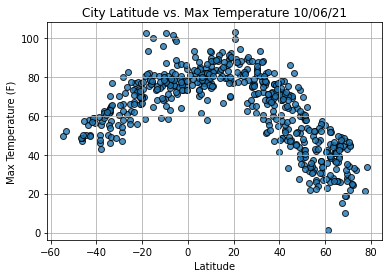

In [56]:
#build the scatterplot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")
plt.show()

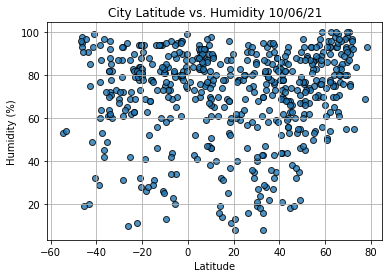

In [57]:
#build the scatterplot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")
plt.show()

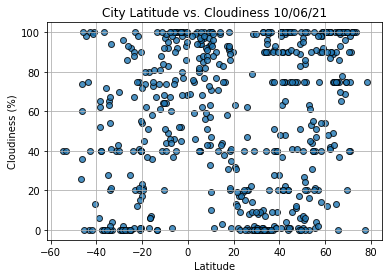

In [58]:
#build the scatterplot for latitude vs cloudines
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")
plt.show()

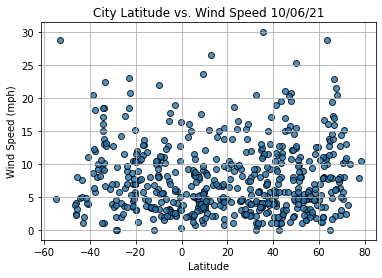

In [59]:
#build the scatterplot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")
plt.show()

In [60]:
#creat function to perform linear regression on data and plot regression line and equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y =" + str(round(slope,2)) + " x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [61]:
#create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

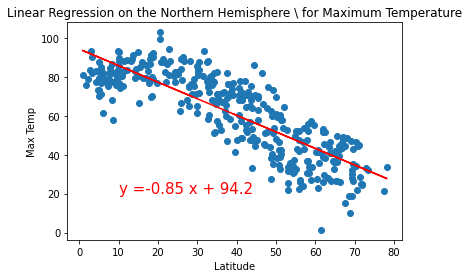

In [62]:
#linear regresiion on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature',
                      'Max Temp', (10,20))

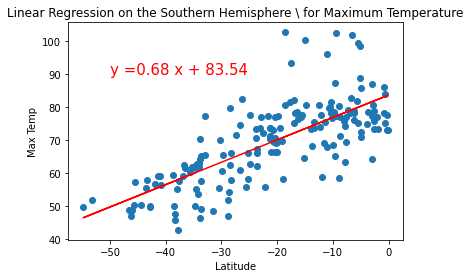

In [63]:
#linear regresiion on the northern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature',
                      'Max Temp', (-50,90))

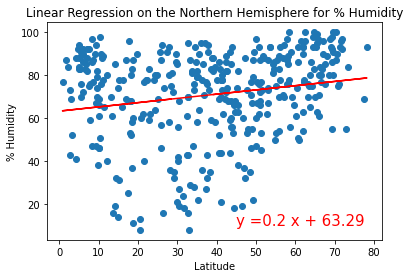

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))

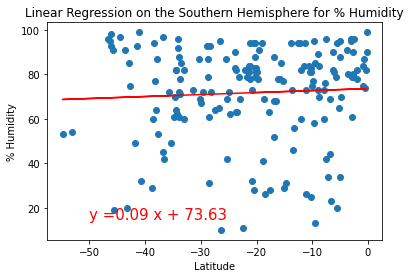

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

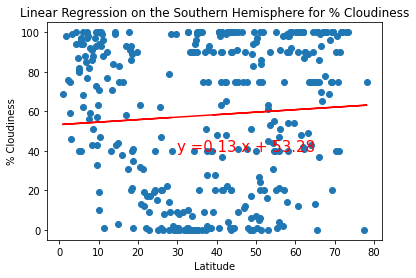

In [66]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(30,40))

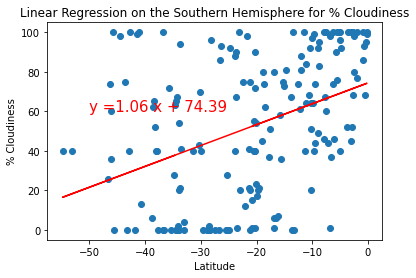

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

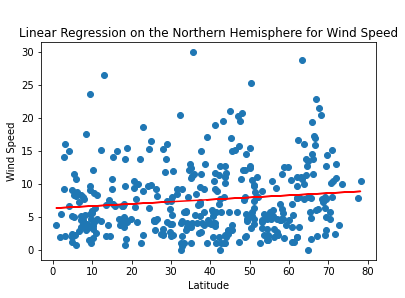

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

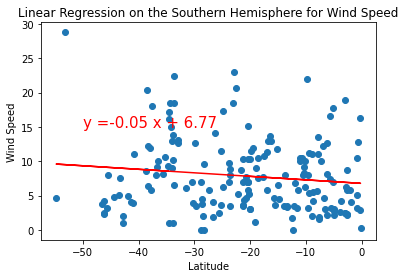

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,15))

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Port Lincoln,AU,2021-10-06 17:50:56,-34.7333,135.8667,50.07,61,28,9.26
1,1,Riwaka,NZ,2021-10-06 17:50:57,-41.0833,173.0000,59.00,99,100,3.87
2,2,Naze,JP,2021-10-06 17:50:57,28.3667,129.4833,76.46,75,99,11.74
3,3,Saint-Philippe,RE,2021-10-06 17:50:58,-21.3585,55.7679,71.19,84,41,3.53
4,4,Tanout,NE,2021-10-06 17:50:58,14.9709,8.8879,92.86,14,3,9.26
